# Generate Predictions from Trained Model

# This is the python notebook for testing the pretrained model.

 ## Note: Please run each cell and follow the instruction as given
 
 
 

## Running the cell below download the keras retinanet model
https://github.com/fizyr/keras-retinanet
user can go through it for the further detail and installation process

In [1]:
#!git clone https://github.com/fizyr/keras-retinanet.git

 ## you can run the code directly from the cloned repository, however you need to run python setup.py build_ext --inplace to compile Cython code first.

In [2]:
 #python keras-retinanet/setup.py build_ext --inplace

# All the required libraries required to run the model

In [3]:
import os
from os import listdir, walk
from os.path import join
from keras_retinanet.bin.train import create_models
from keras_retinanet.models import backbone,convert_model
from keras_retinanet.utils.config import read_config_file,parse_anchor_parameters
import numpy as np
import keras
import math
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
import cv2
import time
import matplotlib.pyplot as plt
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.visualization import draw_box, draw_caption
import tensorflow as tf
tf.set_random_seed(31)
np.random.seed(17)

Using TensorFlow backend.


In [4]:
model, training_model, prediction_model = create_models(
            backbone_retinanet=backbone('resnet50').retinanet,
            num_classes=2,
            weights=None,
            multi_gpu=False,
            freeze_backbone=False,
            lr=1e-3,
            config=read_config_file('config.ini')
        )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


tracking <tf.Variable 'Variable:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(15, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Load and Convert Model

Training model needs to be converted to inference model

In [5]:
training_model.load_weights('resnet50_csv_59.h5')

In [6]:
infer_model = convert_model(training_model,anchor_params=parse_anchor_parameters(read_config_file('config.ini')))

tracking <tf.Variable 'Variable_5:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_6:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_7:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_8:0' shape=(15, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_9:0' shape=(15, 4) dtype=float32> anchors


In [7]:
labels_to_names={0:"c",1:"n"}

In [8]:
def read_image(image_path):
    '''
    Args:
    image path: user is required to give the image path for the detection
    '''
    image = read_image_bgr(image_path)
    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)
    # process image
    start = time.time()
    boxes, scores, labels = infer_model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)
    # correct for image scale
    boxes /= scale
    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.2:
            break
        
        color = label_color(label)
    
        b = box.astype(int)
        draw_box(draw, b, color=color)
    
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)
    
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()


processing time:  1.2554857730865479


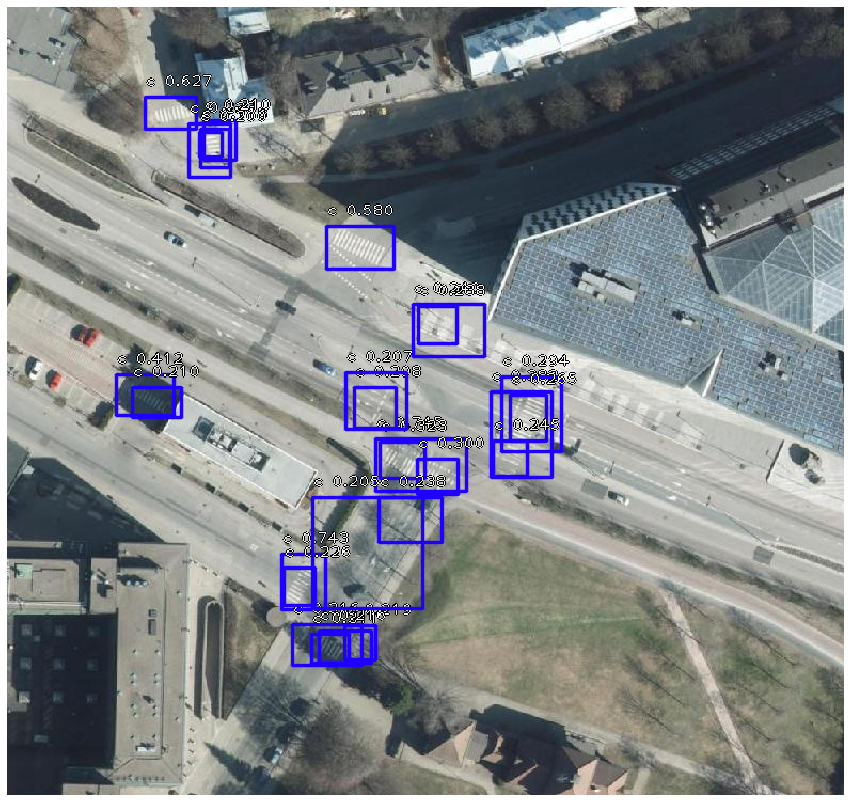

In [11]:
read_image('/home/karki/Desktop/Untitled Folder/road_cross/test image/Screenshot from 2020-01-16 09-21-39.png')